## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("Imported")

Imported


### Loading the model

In [3]:
loaded_model = tf.keras.models.load_model('weed_trained_Model.keras')
print('Model Loaded Successfully')
loaded_model.summary()

Model Loaded Successfully
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                          

### Loading the Image

Imported cv2
Image Read


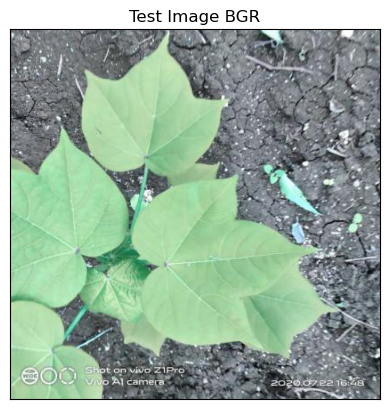

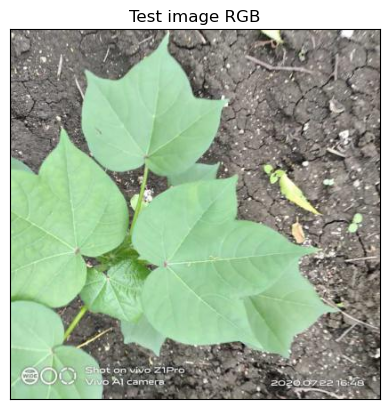

In [9]:
#import matplotlib to plot the image
import matplotlib.pyplot as plt

# to perform image visualisation we need the opencv library
import cv2
print("Imported cv2")

# Reading the img
img_path = r"test\Otanthus_maritimus_Cotton_Weed\test_img_otanthus_maritimus2.JPG"
img = cv2.imread(img_path)    # default reads the image in BGR(used for image processing) format
print('Image Read')

# displaying the image before converting it to RGB
plt.imshow(img)
plt.title("Test Image BGR")
plt.xticks([])
plt.yticks([])     #remove the x-axis and y-axis marks
plt.show()

# converting the image to RGB format, overwriting
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#displaying the image in RGB format
plt.imshow(img)
plt.title("Test image RGB")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing the model

In [10]:
# loading the iimage and preprocessing it into our required size
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))
print("Image Processed")

# converting the image into an array of pixels since our model understands in that format
img_arr = tf.keras.preprocessing.image.img_to_array(image)

# convert the image_array into a batch
img_arr = np.array([img_arr])

# printing the array and the structure
print(img_arr, img_arr.shape)

Image Processed
[[[[123. 119. 116.]
   [120. 116. 113.]
   [140. 136. 137.]
   ...
   [127. 124. 117.]
   [177. 174. 167.]
   [142. 139. 132.]]

  [[161. 158. 151.]
   [138. 135. 128.]
   [125. 122. 117.]
   ...
   [164. 161. 154.]
   [146. 143. 136.]
   [134. 131. 124.]]

  [[158. 156. 144.]
   [145. 142. 133.]
   [161. 158. 151.]
   ...
   [186. 183. 176.]
   [138. 135. 128.]
   [146. 143. 136.]]

  ...

  [[156. 201. 158.]
   [152. 197. 156.]
   [163. 209. 170.]
   ...
   [ 89.  86.  77.]
   [132. 129. 124.]
   [134. 131. 126.]]

  [[157. 203. 157.]
   [152. 197. 154.]
   [162. 209. 167.]
   ...
   [155. 152. 143.]
   [139. 136. 131.]
   [103. 100.  95.]]

  [[158. 204. 158.]
   [153. 199. 153.]
   [163. 210. 166.]
   ...
   [133. 130. 121.]
   [186. 183. 178.]
   [103. 100.  95.]]]] (1, 128, 128, 3)


In [11]:
#making prediction
prediction = loaded_model.predict(img_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 284ms/step


(array([[5.0177141e-07, 1.8613319e-13, 5.8250962e-04, 9.5463741e-12,
         4.7377817e-09, 9.9940801e-01, 8.9815385e-06]], dtype=float32),
 (1, 7))

### Saving Prediction history

In [20]:
# saving these predictions in a json file, for later need in the main.py web code to plot the graph on the website


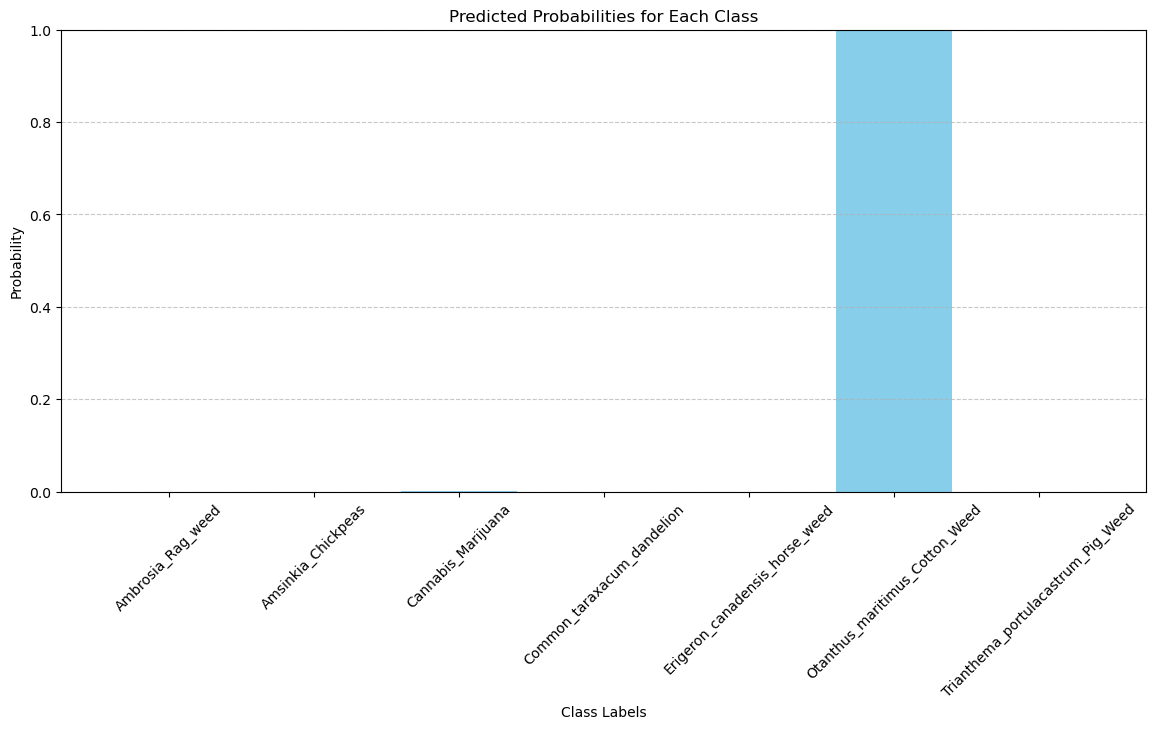

In [19]:
# to plot a histogram of the prediction of file w.r.t each class
import numpy as np
import matplotlib.pyplot as plt

# Extract the probabilities from the prediction array
prediction_probs = prediction[0]

# Define class labels (assuming you have 7 classes)
class_labels = ['Ambrosia_Rag_weed',
 'Amsinkia_Chickpeas',
 'Cannabis_Marijuana',
 'Common_taraxacum_dandelion',
 'Erigeron_canadensis_horse_weed',
 'Otanthus_maritimus_Cotton_Weed',
 'Trianthema_portulacastrum_Pig_Weed']

# Plotting the histogram
plt.figure(figsize=(14, 6))
plt.bar(class_labels, prediction_probs, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Probability')
plt.title('Predicted Probabilities for Each Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1] for probabilities
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# taking the result here, it will give the 'class index' not the class number. class number = class index + 1
result_class_index = np.argmax(prediction)
result_class_index

5

In [7]:
# all the classes in the datasets
class_names = ['Ambrosia_Rag_weed',
 'Amsinkia_Chickpeas',
 'Cannabis_Marijuana',
 'Common_taraxacum_dandelion',
 'Erigeron_canadensis_horse_weed',
 'Otanthus_maritimus_Cotton_Weed',
 'Trianthema_portulacastrum_Pig_Weed']

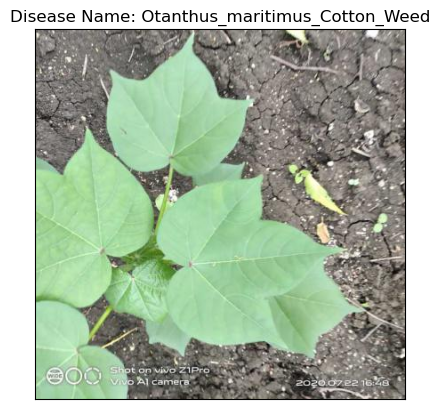

In [13]:
#Displaying the result with the image
model_final_prediction = class_names[result_class_index]

plt.imshow(img)
plt.title(f"Disease Name: {model_final_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()